In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Load the IMDb movie reviews dataset
vocab_size = 10000  # Limit the vocabulary size to the most frequent 10,000 words
max_len = 256  # Limit the maximum length of each review to 256 words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [5]:
# Pad sequences to have the same length for each review
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [6]:
# Build the sentiment analysis model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Train the model and store training history
batch_size = 128
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 77s 480ms/step - loss: 0.4672 - accuracy: 0.7703 - val_loss: 0.3099 - val_accuracy: 0.8676
Epoch 2/5
157/157 [==============================] - 76s 481ms/step - loss: 0.2353 - accuracy: 0.9112 - val_loss: 0.3310 - val_accuracy: 0.8516
Epoch 3/5
157/157 [==============================] - 77s 489ms/step - loss: 0.1729 - accuracy: 0.9383 - val_loss: 0.3224 - val_accuracy: 0.8744
Epoch 4/5
157/157 [==============================] - 74s 475ms/step - loss: 0.1211 - accuracy: 0.9572 - val_loss: 0.4204 - val_accuracy: 0.8714
Epoch 5/5
157/157 [==============================] - 78s 497ms/step - loss: 0.0938 - accuracy: 0.9671 - val_loss: 0.4196 - val_accuracy: 0.8506


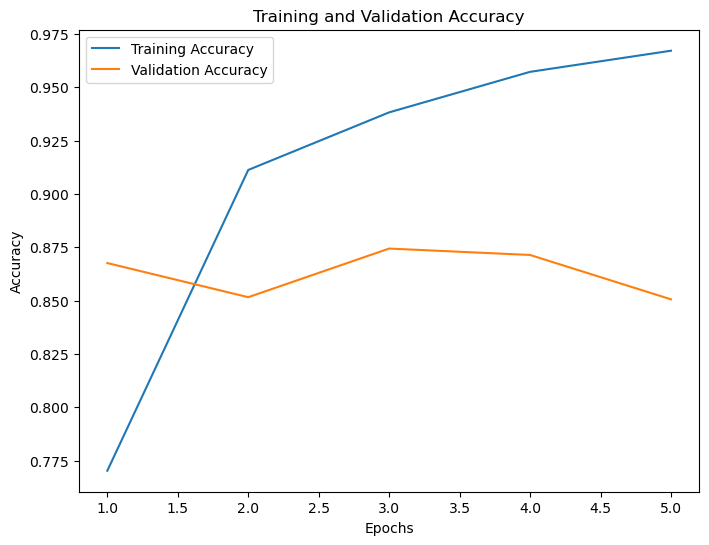

In [9]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, epochs + 1), y=history.history['accuracy'], label='Training Accuracy')
sns.lineplot(x=range(1, epochs + 1), y=history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

782/782 [==============================] - 18s 23ms/step - loss: 0.4248 - accuracy: 0.8478
Test Loss: 0.4247981905937195, Test Accuracy: 0.847760021686554


In [14]:
# Generate predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

782/782 [==============================] - 18s 22ms/step


In [15]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

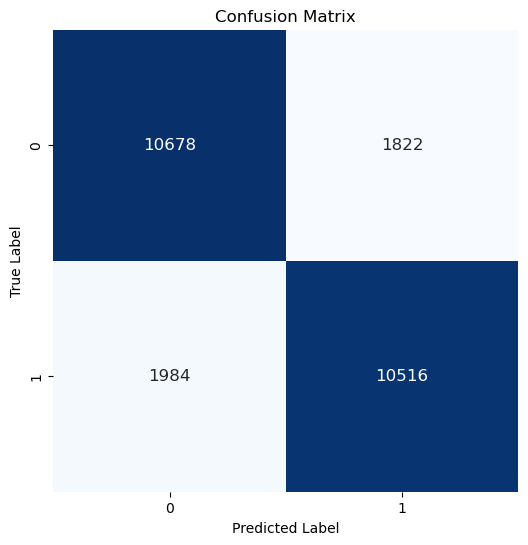

In [16]:
# Plot confusion matrix heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 12})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.85     12500
    Positive       0.85      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

